In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as m
import random
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
import sys
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/Finance/main/dataset/Automobile%20Dataset/Automobile_data.csv")

In [4]:
data.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


In [5]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [7]:
data.replace("?", np.nan, inplace=True)

In [8]:
missing_data = data.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [10]:
data['normalized-losses']=data['normalized-losses'].astype(float)
data['bore']=data['bore'].astype(float)
data['stroke']=data['stroke'].astype(float)
data['horsepower']=data['horsepower'].astype(float)
data['peak-rpm']=data['peak-rpm'].astype(float)
data['price']=data['price'].astype(float)

In [11]:
data[data["num-of-doors"].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
63,0,NaN,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0


In [12]:
data[(data['body-style']=='sedan')  & ((data['make']=='dodge') | (data['make']=='mazda'))]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
25,1,148.0,dodge,gas,std,four,sedan,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.4,68.0,5500.0,31,38,6692.0
26,1,148.0,dodge,gas,std,four,sedan,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.4,68.0,5500.0,31,38,7609.0
27,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
53,1,113.0,mazda,gas,std,four,sedan,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68.0,5000.0,31,38,6695.0
54,1,113.0,mazda,gas,std,four,sedan,fwd,front,93.1,...,91,2bbl,3.08,3.15,9.0,68.0,5000.0,31,38,7395.0
60,0,115.0,mazda,gas,std,four,sedan,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32,8495.0
62,0,115.0,mazda,gas,std,four,sedan,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32,10245.0
63,0,NaN,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0
65,0,118.0,mazda,gas,std,four,sedan,rwd,front,104.9,...,140,mpfi,3.76,3.16,8.0,120.0,5000.0,19,27,18280.0
66,0,NaN,mazda,diesel,std,four,sedan,rwd,front,104.9,...,134,idi,3.43,3.64,22.0,72.0,4200.0,31,39,18344.0


In [13]:
data["num-of-doors"].replace(np.nan, "four", inplace=True)

In [14]:
data[data['horsepower'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,NaN,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9295.0
131,2,NaN,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9895.0


In [15]:
data[data.columns[1:]].corr()['horsepower'][:-1]

normalized-losses    0.295772
wheel-base           0.352297
length               0.555003
width                0.642482
height              -0.110711
curb-weight          0.751034
engine-size          0.810773
bore                 0.577273
stroke               0.090254
compression-ratio   -0.205874
horsepower           1.000000
peak-rpm             0.130971
city-mpg            -0.803620
highway-mpg         -0.770908
Name: horsepower, dtype: float64

<AxesSubplot:xlabel='horsepower', ylabel='engine-size'>

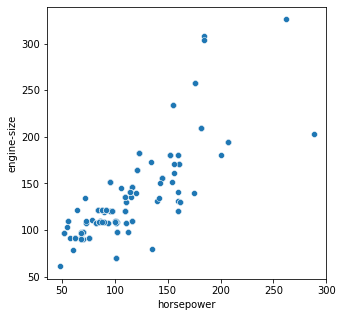

In [16]:
plt.figure(figsize = (5,5))
sns.scatterplot(x = 'horsepower', y = 'engine-size', data = data)

In [17]:
data[(data['engine-size'] > 127) & (data['engine-size'] < 137)]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
66,0,NaN,mazda,diesel,std,four,sedan,rwd,front,104.9,...,134,idi,3.43,3.64,22.0,72.0,4200.0,31,39,18344.0
117,0,161.0,peugot,gas,turbo,four,sedan,rwd,front,108.0,...,134,mpfi,3.61,3.21,7.0,142.0,5600.0,18,24,18150.0


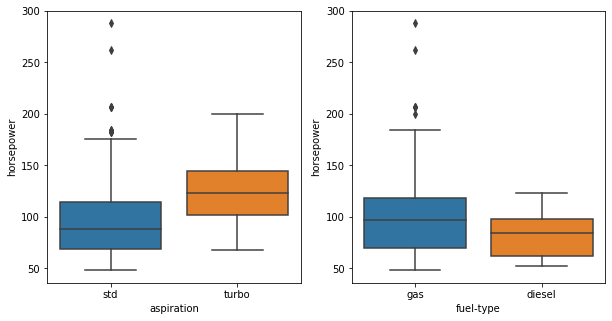

In [18]:
features = ["aspiration","fuel-type"]
plt.figure(figsize = (10,5))
for i in enumerate (features):
    plt.subplot(1,2,i[0]+1)
    sns.boxplot(x = i[1],y = 'horsepower',data = data)

In [19]:
data[((data['fuel-type'] == 'gas') & (data['aspiration'] == 'std')) & ((data['engine-size'] > 127) & (data['engine-size'] < 137))]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
130,0,NaN,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,NaN,NaN,23,31,9295.0
131,2,NaN,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,NaN,NaN,23,31,9895.0
191,0,NaN,volkswagen,gas,std,four,sedan,fwd,front,100.4,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,24,13295.0


In [20]:
data["horsepower"].replace(np.nan, 112, inplace=True)

In [21]:
data[data['peak-rpm'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,NaN,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,112.0,NaN,23,31,9295.0
131,2,NaN,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,112.0,NaN,23,31,9895.0


In [22]:
data.iloc[130:132, 10:16]

,length,width,height,curb-weight,engine-type,num-of-cylinders
130,181.5,66.5,55.2,2579,ohc,four
131,176.8,66.6,50.5,2460,ohc,four


In [23]:
data[data.columns[1:]].corr()['peak-rpm'][:-1]

normalized-losses    0.264597
wheel-base          -0.361052
length              -0.287325
width               -0.219957
height              -0.322272
curb-weight         -0.266306
engine-size         -0.244618
bore                -0.264269
stroke              -0.071493
compression-ratio   -0.436221
horsepower           0.130971
peak-rpm             1.000000
city-mpg            -0.113788
highway-mpg         -0.054257
Name: peak-rpm, dtype: float64

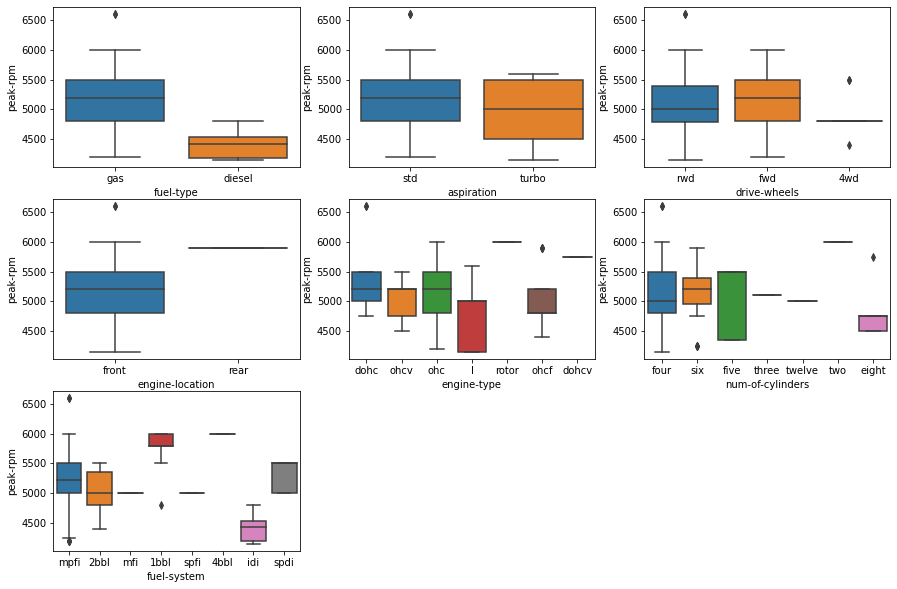

In [24]:
features = ["fuel-type","aspiration","drive-wheels","engine-location","engine-type","num-of-cylinders","fuel-system",]
plt.figure(figsize = (15,10))
for i in enumerate (features):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x = i[1],y = 'peak-rpm',data = data)

In [25]:
nan_peak_rpm = data[(data['peak-rpm'] >= 4800) & (data['peak-rpm'] <= 5500) & (data['fuel-system'] == 'mpfi') & (data['engine-location'] == 'front') & (data['drive-wheels'] == 'rwd') & (data['aspiration'] == 'std') & (data['fuel-type'] == 'gas') & (data['engine-type'] == 'ohc') & (data['num-of-cylinders'] == 'four')]
nan_peak_rpm['peak-rpm'].mean()

5100.0

In [26]:
data["peak-rpm"].replace(np.nan, 5100, inplace=True)

In [27]:
data[data['bore'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,10945.0
56,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,11845.0
57,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,13645.0
58,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,NaN,NaN,9.4,135.0,6000.0,16,23,15645.0


In [28]:
data.iloc[55:59, 10:16]

,length,width,height,curb-weight,engine-type,num-of-cylinders
55,169.0,65.7,49.6,2380,rotor,two
56,169.0,65.7,49.6,2380,rotor,two
57,169.0,65.7,49.6,2385,rotor,two
58,169.0,65.7,49.6,2500,rotor,two


In [29]:
data['engine-type'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: engine-type, dtype: int64

In [30]:
data.drop([55,56], axis=0, inplace=True)
data[data.columns[1:]].corr()['bore'][:-1]

normalized-losses   -0.036167
wheel-base           0.490378
length               0.607480
width                0.559204
height               0.176195
curb-weight          0.649045
engine-size          0.594090
bore                 1.000000
stroke              -0.055909
compression-ratio    0.005203
horsepower           0.577439
peak-rpm            -0.264045
city-mpg            -0.594584
highway-mpg         -0.594572
Name: bore, dtype: float64

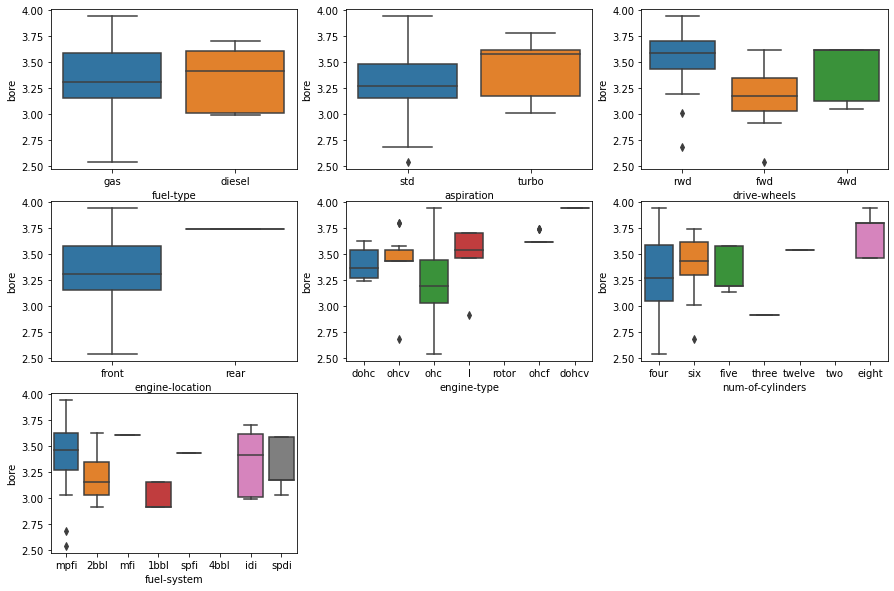

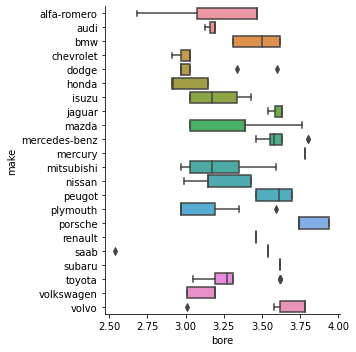

In [31]:
features = ["fuel-type","aspiration","drive-wheels","engine-location","engine-type","num-of-cylinders","fuel-system",]
plt.figure(figsize = (15,10))
for i in enumerate (features):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x = i[1],y = 'bore',data = data)

sns.catplot(y="make", x="bore", kind="box", data=data)

In [32]:
nan_bore = data[(data['bore'] >= 3.3) & (data['bore'] <= 3.65)& (data['make']=='mazda')]
nan_bore

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
59,1,129.0,mazda,gas,std,two,hatchback,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32,8845.0
60,0,115.0,mazda,gas,std,four,sedan,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32,8495.0
61,1,129.0,mazda,gas,std,two,hatchback,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32,10595.0
62,0,115.0,mazda,gas,std,four,sedan,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32,10245.0
63,0,NaN,mazda,diesel,std,four,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0
64,0,115.0,mazda,gas,std,four,hatchback,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32,11245.0
66,0,NaN,mazda,diesel,std,four,sedan,rwd,front,104.9,...,134,idi,3.43,3.64,22.0,72.0,4200.0,31,39,18344.0


In [33]:
nan_bore["bore"].mode()

0    3.39
dtype: float64

In [34]:
data["bore"].replace(np.nan, 3.39, inplace=True)

In [35]:
data[data["stroke"].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
57,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,3.39,NaN,9.4,101.0,6000.0,17,23,13645.0
58,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,3.39,NaN,9.4,135.0,6000.0,16,23,15645.0


In [37]:
data[data.columns[1:]].corr()['stroke'][:-1]

normalized-losses    0.065627
wheel-base           0.161477
length               0.129739
width                0.182956
height              -0.056999
curb-weight          0.168929
engine-size          0.206675
bore                -0.055909
stroke               1.000000
compression-ratio    0.186170
horsepower           0.092337
peak-rpm            -0.070322
city-mpg            -0.042906
highway-mpg         -0.044528
Name: stroke, dtype: float64

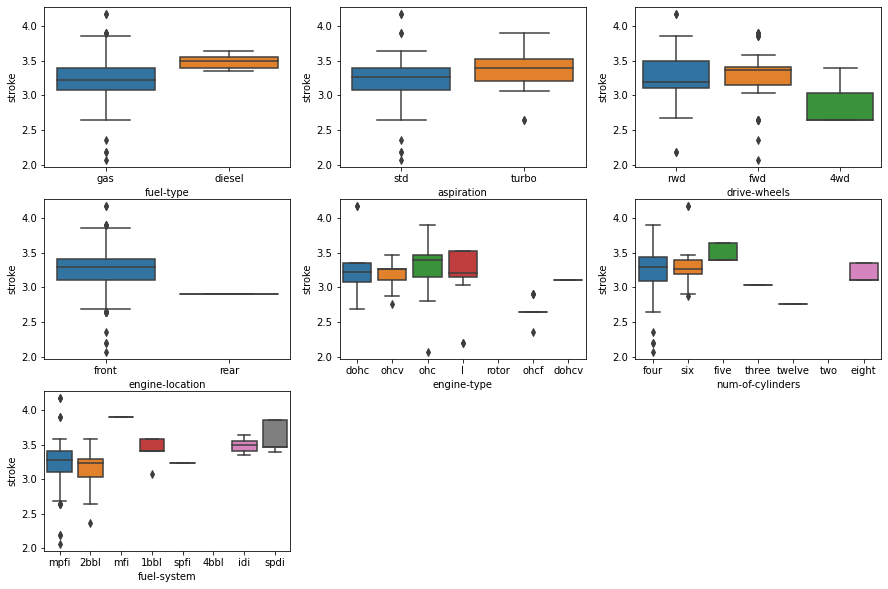

In [39]:
features = ["fuel-type","aspiration","drive-wheels","engine-location","engine-type","num-of-cylinders","fuel-system",]
plt.figure(figsize = (15,10))
for i in enumerate (features):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x = i[1],y = 'stroke',data = data)

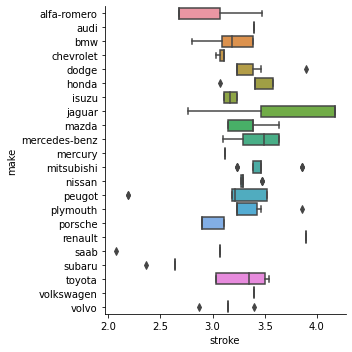

In [40]:
sns.catplot(y="make", x="stroke", kind="box", data=data)

In [41]:
nan_stroke = data[(data['stroke'] >= 3.1) & (data['stroke'] <= 3.4)& (data['make']=='mazda')]

In [42]:
nan_stroke = data[(data['stroke'] >= 3.1) & (data['stroke'] <= 3.4)& (data['make']=='mazda')]

In [43]:
nan_stroke["stroke"].mode()

0    3.39
dtype: float64

In [44]:
data[data["normalized-losses"].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
14,1,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,...,164,mpfi,3.31,3.19,9.0,121.0,4250.0,20,25,24565.0
15,0,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,30760.0
16,0,NaN,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,41315.0
17,0,NaN,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,15,20,36880.0


In [45]:
data[data.columns[1:]].corr()['normalized-losses'][:-1]

normalized-losses    1.000000
wheel-base          -0.069276
length               0.026117
width                0.104965
height              -0.424930
curb-weight          0.122004
engine-size          0.186115
bore                -0.032582
stroke               0.065627
compression-ratio   -0.131334
horsepower           0.295418
peak-rpm             0.253048
city-mpg            -0.248245
highway-mpg         -0.200520
Name: normalized-losses, dtype: float64

<AxesSubplot:xlabel='normalized-losses', ylabel='Density'>

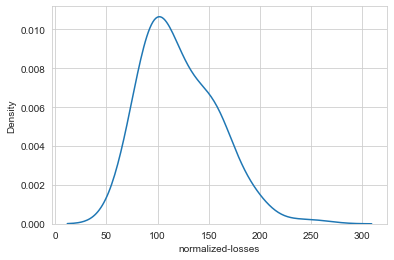

In [46]:
sns.set_style('whitegrid')
sns.kdeplot(data['normalized-losses'], bw=0.5)

In [47]:
median = data['normalized-losses'].median()
data["normalized-losses"].replace(np.nan, median, inplace=True)

In [48]:
data_without_price = data[data['price'].isnull()]
data.dropna(subset=["price"], axis=0, inplace=True)
data.reset_index(drop=True, inplace=True)

In [51]:
data.isnull().values.any()

True

In [52]:
data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,197.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,0.819095,120.417085,98.832161,174.253266,65.890955,53.808543,2557.432161,127.447236,3.331307,3.256904,10.171960,103.507538,5108.542714,25.261307,30.763819,13225.341709
std,1.242122,32.137519,6.086686,12.373104,2.111971,2.423887,519.599899,41.359058,0.269488,0.319256,4.024401,37.562859,472.183181,6.402498,6.805338,7984.876506
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,99.500000,94.500000,166.550000,64.100000,52.000000,2157.000000,98.000000,3.150000,3.110000,8.550000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2420.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,24.000000,30.000000,10245.000000
75%,2.000000,137.000000,102.400000,183.500000,66.750000,55.550000,2930.500000,143.000000,3.585000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16501.500000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


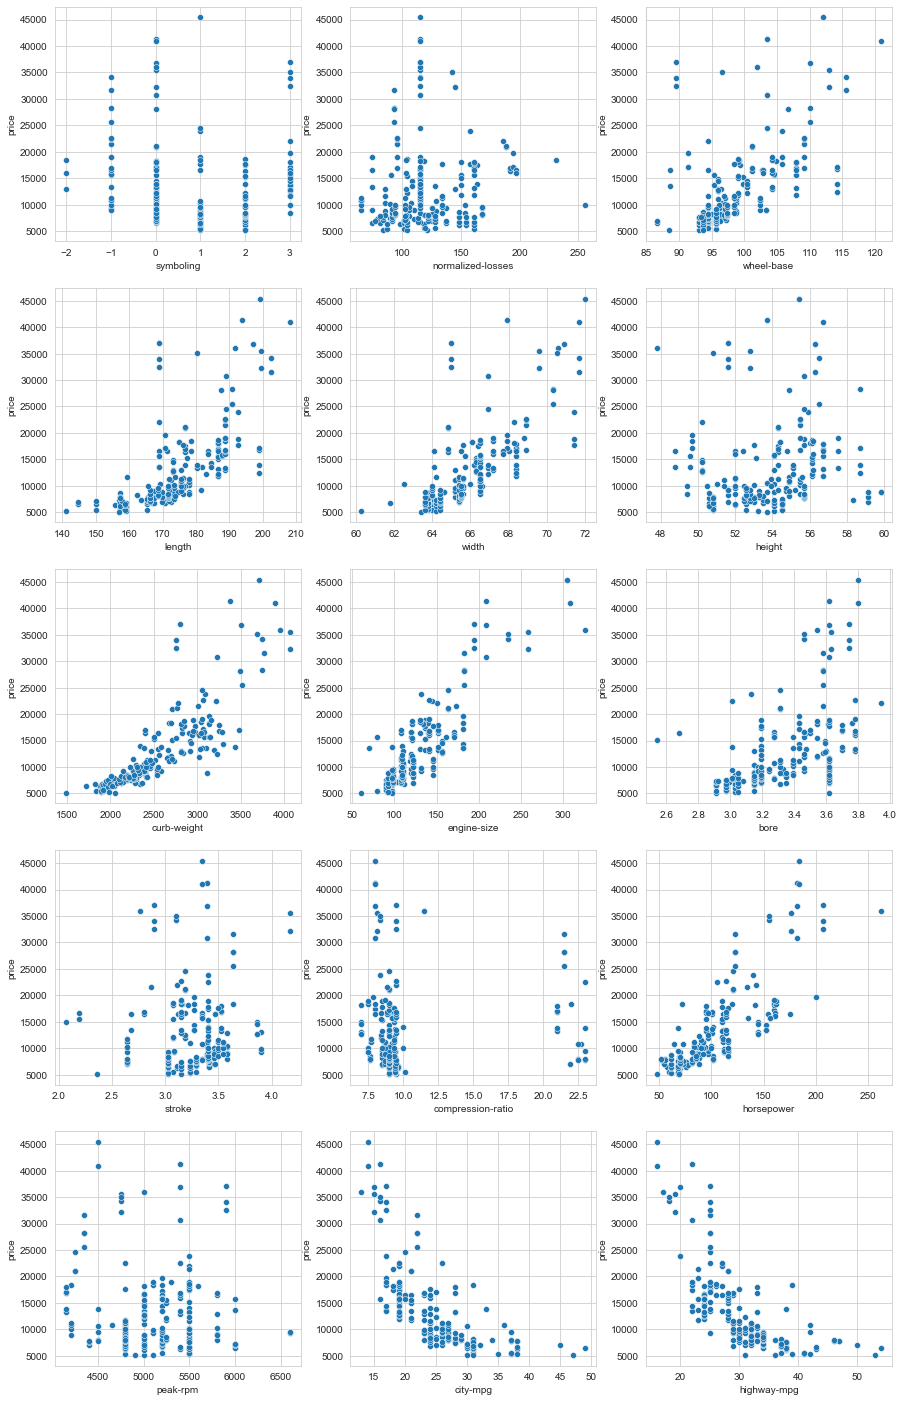

In [53]:
num_features = ['symboling','normalized-losses','wheel-base','length','width','height','curb-weight','engine-size','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg']
plt.figure(figsize = (15,25))
for i in enumerate (num_features):
    plt.subplot(5,3,i[0]+1)
    sns.scatterplot(x = i[1],y = 'price',data = data)

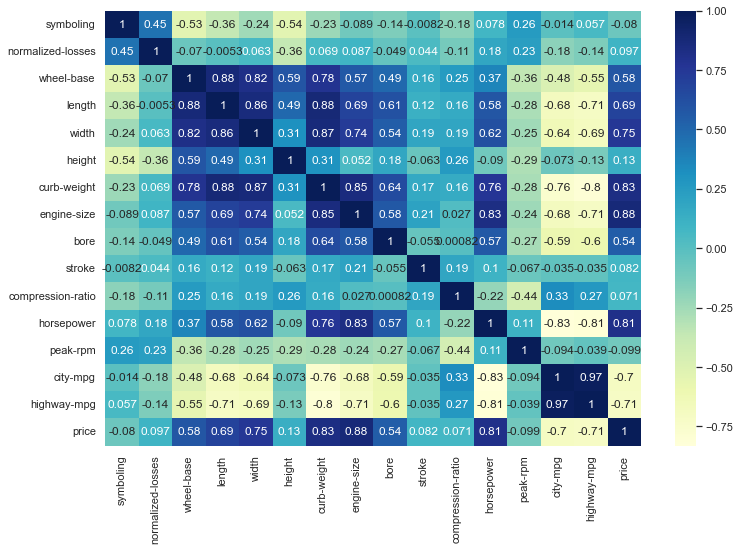

In [54]:
sns.set(rc = {'figure.figsize':(12,8)})
dataplot = sns.heatmap(data.corr(),cmap="YlGnBu",annot=True)

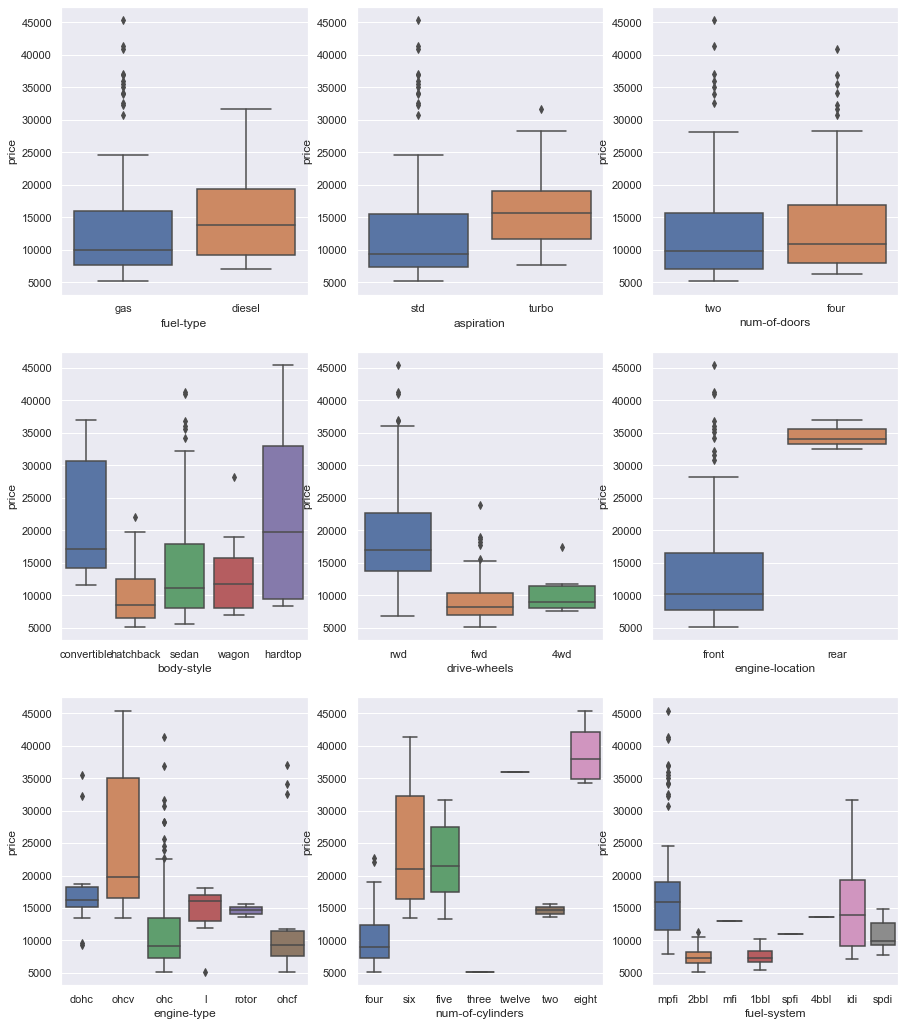

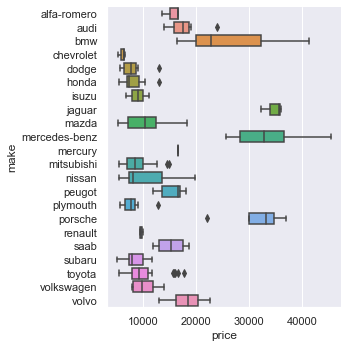

In [55]:
cat_features = ['fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
        'engine-type','num-of-cylinders', 'fuel-system']
plt.figure(figsize = (15,18))
for i in enumerate (cat_features):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x = i[1],y = 'price',data = data)
sns.catplot(y="make", x="price", kind="box", data=data)

In [56]:
cat_features = ['make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system']
encoded_data = pd.get_dummies(data, columns = cat_features)
encoded_data.shape

(199, 75)

In [57]:
X = encoded_data.drop('price', axis = 1)
y = encoded_data['price']
print(X.shape,y.shape)

(199, 74) (199,)


In [58]:
X = encoded_data.drop('price', axis = 1)
y = encoded_data['price']
print(X.shape,y.shape)

(199, 74) (199,)


In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error